In [178]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from scipy import sparse
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean

In [179]:
def text_preprocessing(
    text:list,
    punctuations = r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''',
    stop_words=['and', 'a', 'is', 'the', 'in', 'be', 'will', 'to', 'it', 'on', 'of', 'for', 'at', 'but', 'so', 'yet', 'an',
                'this', 'that', 'these', 'those', 'can', 'their', 'her', 'his', 'you', 'i', 'we', 'he', 'she', 'can', 'only', 'with', 'by']
    )->list:

    for x in text.lower():
        if x in punctuations:
            text = text.replace(x, "")

    # Removing words that have numbers in them
    text = re.sub(r'\w*\d\w*', '', text)

    # Removing digits
    text = re.sub(r'[0-9]+', '', text)

    # Cleaning the whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Setting every word to lower
    text = text.lower()

    # Converting all our text to a list
    text = text.split(' ')

    # Droping empty strings
    text = [x for x in text if x!='']

    # Droping stop words
    text = [x for x in text if x not in stop_words]

    return text

In [180]:
doc1 = pd.read_csv('document.csv')
doc1 = [x for x in doc1['text']]
doc1

['The future king is the prince.',
 'Daughter is the princess.',
 'Son is the prince.',
 'Only a man can be a king.',
 'Only a woman can be a queen.',
 'The princess will be a queen.',
 'Queen and king rule the realm.',
 'The prince is a strong man.',
 'The princess is a beautiful woman.',
 'The royal family is the king  and queen and their children.',
 'Prince is only a boy  now.',
 'A boy will be a man.']

In [181]:
doc2 = pd.read_csv('doc2.csv')
doc2 = [x for x in doc2['text']]
doc2

['The prince is set to become the future king.',
 'A daughter grows up as a princess.',
 "A son's journey leads to being a prince.",
 'Only a man can wear the crown of king.',
 'The role of queen is exclusive to women.',
 'The princess is destined to be queen.',
 'The king and queen jointly rule the realm.',
 'The prince exemplifies strength.',
 'A beautiful woman is the princess.',
 'The royal family includes the king, queen, and kids.',
 'The young prince is a boy for now.',
 'A boy matures into a man.']

In [182]:
window = 2
word_lists1 = []
word_lists2 = []
words1 = []
words2 = []

In [183]:
for text in doc1:
    text = text_preprocessing(text)
    words1 += text

    for i, word in enumerate(text):
        for w in range(window):
            if i + 1 + w < len(text):
                word_lists1.append([word] + [text[(i + 1 + w)]])

            if i - w - 1 >= 0:
                word_lists1.append([word] + [text[(i - w - 1)]])

print(word_lists1)

[['future', 'king'], ['future', 'prince'], ['king', 'prince'], ['king', 'future'], ['prince', 'king'], ['prince', 'future'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['queen', 'king'], ['queen', 'rule'], ['king', 'rule'], ['king', 'queen'], ['king', 'realm'], ['rule', 'realm'], ['rule', 'king'], ['rule', 'queen'], ['realm', 'rule'], ['realm', 'king'], ['prince', 'strong'], ['prince', 'man'], ['strong', 'man'], ['strong', 'prince'], ['man', 'strong'], ['man', 'prince'], ['princess', 'beautiful'], ['princess', 'woman'], ['beautiful', 'woman'], ['beautiful', 'princess'], ['woman', 'beautiful'], ['woman', 'princess'], ['royal', 'family'], ['royal', 'king'], ['family', 'king'], ['family', 'royal'], ['family', 'queen'], ['king', 'queen'], ['king', 'family'], ['king', 'children'], ['king', 'royal'], ['queen', 'children'], ['qu

In [184]:
for text in doc2:
    text = text_preprocessing(text)
    words2 += text

    for i, word in enumerate(text):
        for w in range(window):
            if i + 1 + w < len(text):
                word_lists2.append([word] + [text[(i + 1 + w)]])

            if i - w - 1 >= 0:
                word_lists2.append([word] + [text[(i - w - 1)]])

print(word_lists2)

[['prince', 'set'], ['prince', 'become'], ['set', 'become'], ['set', 'prince'], ['set', 'future'], ['become', 'future'], ['become', 'set'], ['become', 'king'], ['become', 'prince'], ['future', 'king'], ['future', 'become'], ['future', 'set'], ['king', 'future'], ['king', 'become'], ['daughter', 'grows'], ['daughter', 'up'], ['grows', 'up'], ['grows', 'daughter'], ['grows', 'as'], ['up', 'as'], ['up', 'grows'], ['up', 'princess'], ['up', 'daughter'], ['as', 'princess'], ['as', 'up'], ['as', 'grows'], ['princess', 'as'], ['princess', 'up'], ['sons', 'journey'], ['sons', 'leads'], ['journey', 'leads'], ['journey', 'sons'], ['journey', 'being'], ['leads', 'being'], ['leads', 'journey'], ['leads', 'prince'], ['leads', 'sons'], ['being', 'prince'], ['being', 'leads'], ['being', 'journey'], ['prince', 'being'], ['prince', 'leads'], ['man', 'wear'], ['man', 'crown'], ['wear', 'crown'], ['wear', 'man'], ['wear', 'king'], ['crown', 'king'], ['crown', 'wear'], ['crown', 'man'], ['king', 'crown'],

In [185]:
words1 = list(set(words1))
words2 = list(set(words2))

In [186]:
model1 = Word2Vec(sentences=word_lists1, vector_size=2 ,window=window, min_count=1)

In [187]:
word_embaddings1 = {word: model1.wv[word] for word in model1.wv.index_to_key}
print("Word Embeddings:")
for word, embedding in word_embaddings1.items():
    print(f"{word}: {embedding}")

Word Embeddings:
king: [-0.02681136  0.01182157]
queen: [0.25521109 0.4504787 ]
prince: [-0.46514416 -0.3558143 ]
princess: [0.32293624 0.44864023]
man: [-0.2507714  -0.18816859]
boy: [ 0.36902523 -0.07667357]
family: [-0.22683066  0.32770258]
woman: [-0.24299836 -0.09079246]
rule: [0.14365509 0.04942785]
now: [-0.41426075 -0.4724409 ]
realm: [0.36561027 0.25358745]
strong: [0.3380073  0.03828432]
beautiful: [ 0.31756067 -0.1702524 ]
royal: [-0.04732007  0.28842866]
children: [-0.37608188 -0.19680518]
future: [-0.37557912 -0.04650211]
son: [ 0.47690594 -0.36595833]
daughter: [-0.11668843 -0.09688705]


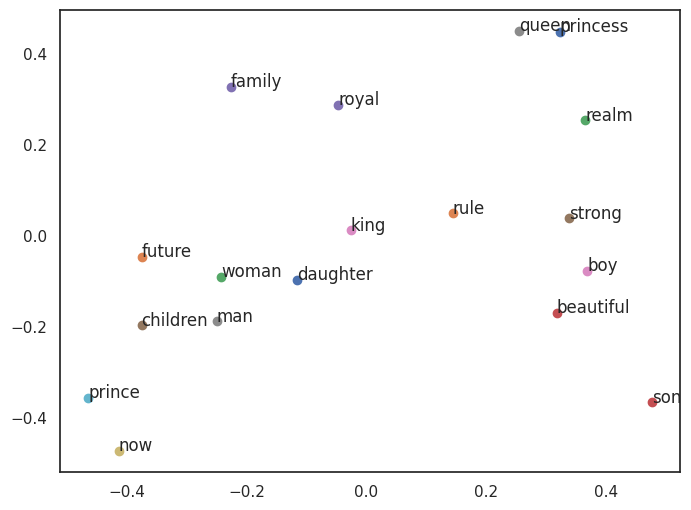

In [188]:
plt.figure(figsize=(8, 6))
for word in words1:
    coord = word_embaddings1.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

In [189]:
model2 = Word2Vec(sentences=word_lists2, vector_size=2 ,window=window, min_count=1)

In [190]:
word_embaddings2 = {word: model2.wv[word] for word in model2.wv.index_to_key}
print("Word Embeddings:")
for word, embedding in word_embaddings2.items():
    print(f"{word}: {embedding}")

Word Embeddings:
queen: [-0.02715503  0.01164475]
king: [0.25516748 0.45046365]
prince: [-0.4651475  -0.35584044]
princess: [0.32288113 0.44917566]
boy: [-0.25096494 -0.188298  ]
includes: [ 0.36902523 -0.07667357]
become: [-0.22680151  0.32760614]
up: [-0.24335729 -0.09080057]
leads: [0.14359263 0.04963287]
jointly: [-0.41418985 -0.4721693 ]
man: [0.36585665 0.25334352]
crown: [0.33789054 0.0385569 ]
set: [ 0.31785765 -0.17001644]
future: [-0.04736539  0.28859028]
grows: [-0.37657973 -0.19674855]
as: [-0.37523058 -0.04634658]
journey: [ 0.47683477 -0.3659772 ]
being: [-0.11668843 -0.09688705]
wear: [ 0.40387183 -0.2965448 ]
into: [ 0.00215573 -0.23745126]
exclusive: [-0.48032165  0.2503343 ]
family: [-0.4379804  -0.21957792]
rule: [-0.00186022 -0.01483163]
matures: [-0.38305393  0.48070896]
young: [0.24910289 0.46165717]
woman: [-0.40841582  0.2255201 ]
kids: [-0.2068538  0.0412268]
royal: [ 0.4249438  -0.22307636]
now: [ 0.22580779 -0.33952963]
daughter: [-0.17745133  0.46999663]
str

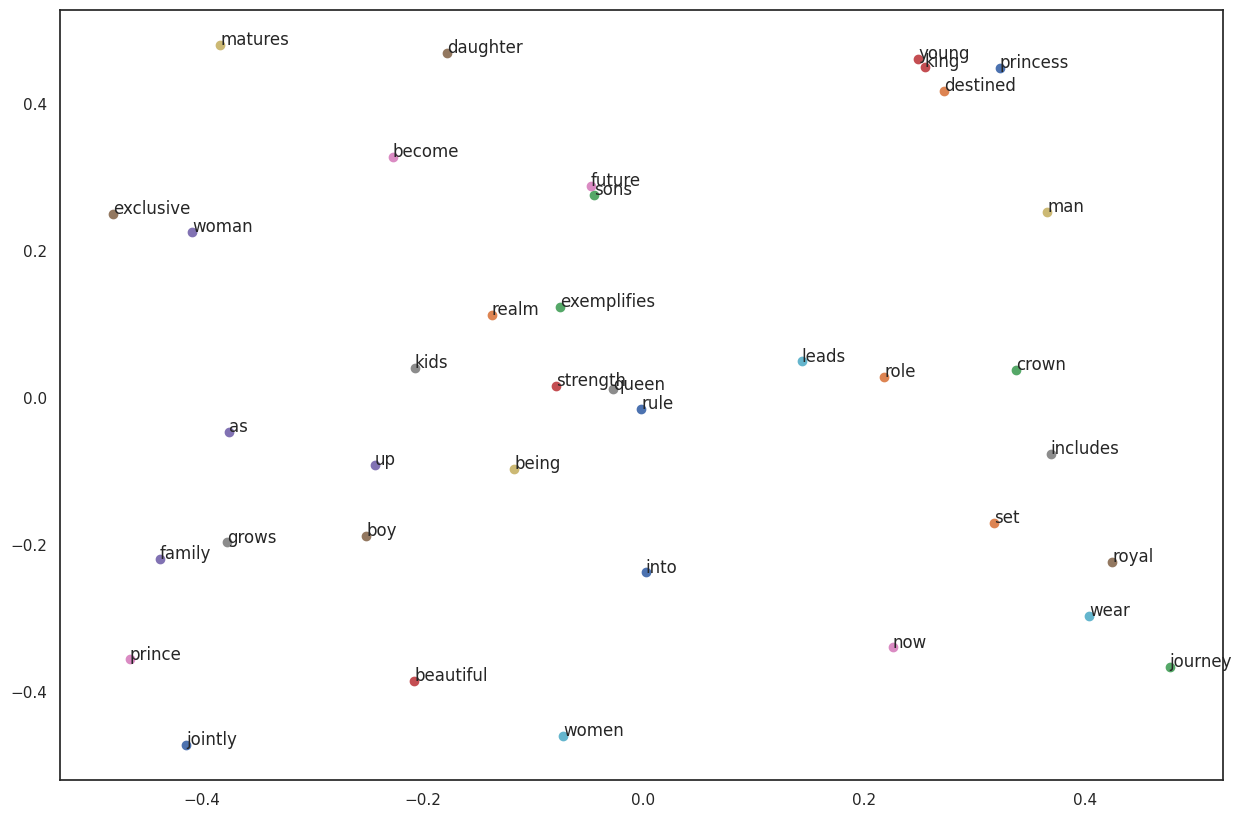

In [191]:
plt.figure(figsize=(15,10))
for word in words2:
    coord = word_embaddings2.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

### **Cosine Similarity**
- Measures the cosine of the angle between two vectors. It is widely
used for comparing documents represented as vectors in a high-dimensional space.
Cosine Similarity ranges from -1 (completely dissimilar) to 1 (completely similar), with 0
indicating orthogonality.

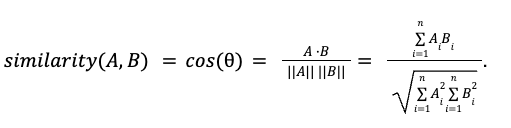

In [166]:
word_embedding1 = np.array(list(word_embaddings1.values()))
word_embedding2 = np.array(list(word_embaddings2.values()))
cos_similarities = cosine_similarity(word_embedding1, word_embedding2)

print('Cosine Similarities:\n', np.round(cos_similarities, 3))

Cosine Similarities:
 [[ 1.    -0.1    0.482 -0.206  0.49  -0.978  0.853  0.716 -0.733  0.3
  -0.523 -0.863 -0.997  0.546  0.624  0.859 -0.971  0.446 -0.976 -0.412
   0.998  0.637 -0.286  0.886 -0.079  0.996  0.976 -0.998 -0.843  0.701
   0.977  0.079  0.822  0.544  0.962 -0.163 -0.256 -0.854]
 [-0.11   1.    -0.92   0.994 -0.916  0.306  0.435 -0.766  0.75  -0.979
   0.901  0.588  0.024  0.779 -0.84  -0.596 -0.139 -0.935 -0.118 -0.866
  -0.035 -0.831 -0.925  0.373  1.    -0.011 -0.313  0.032 -0.452  0.64
  -0.31  -1.     0.485  0.781  0.174  0.998 -0.936  0.603]
 [ 0.491 -0.92   1.    -0.957  1.    -0.654 -0.047  0.957 -0.949  0.981
  -0.999 -0.858 -0.414 -0.471  0.985  0.863 -0.26   0.999 -0.281  0.6
   0.424  0.982  0.702  0.02  -0.912  0.402  0.66  -0.421  0.066 -0.288
   0.657  0.911 -0.104 -0.474  0.226 -0.943  0.724 -0.867]
 [-0.217  0.994 -0.957  1.    -0.954  0.407  0.335 -0.831  0.817 -0.995
   0.942  0.672  0.132  0.706 -0.894 -0.679 -0.031 -0.968 -0.009 -0.806
  -0.143 -0.88

### **Jaccard Similarity:**
- Computes the intersection over the union of two sets. In the context
of document similarity, the sets are the sets of words present in each document. Jaccard
Similarity ranges from 0 to 1, with 1 indicating identical sets.


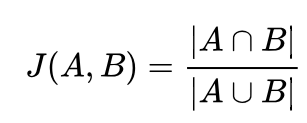

In [167]:
intersection_res = len(set(word_embaddings1).intersection(word_embaddings2))
union_res = len(set(word_embaddings1).union(word_embaddings2))
jaccard_score = intersection_res / union_res
jaccard_score

0.36585365853658536

### **Euclidean Distance:**
- Measures the straight-line distance between two points in space.
In the context of document similarity, it quantifies how far apart the documents are in the
vector space. Smaller distances indicate greater similarity.

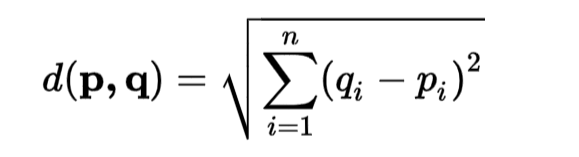

In [168]:
euclidean_distance = np.linalg.norm(np.reshape(word_embedding1, (1, -1)).T - np.reshape(word_embedding2, (1, -1)))
euclidean_distance

21.38174

## Bonus

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


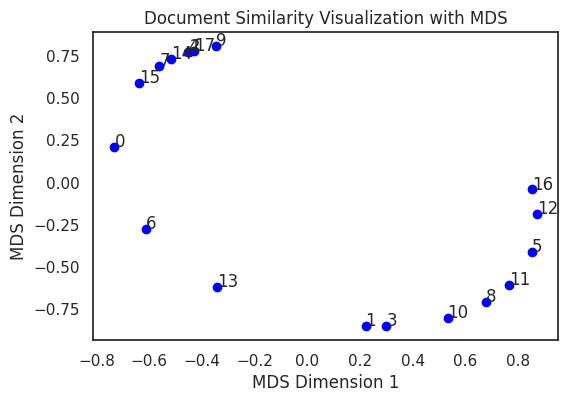

In [ ]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_result = mds.fit_transform(1 - cos_similarities)

plt.figure(figsize=(6, 4))
plt.scatter(mds_result[:, 0], mds_result[:, 1], c='blue', marker='o')

for i, txt in enumerate(range(cos_similarities.shape[0])):
    plt.annotate(txt, (mds_result[i, 0], mds_result[i, 1]))

plt.title('Document Similarity Visualization with MDS')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')

plt.show()

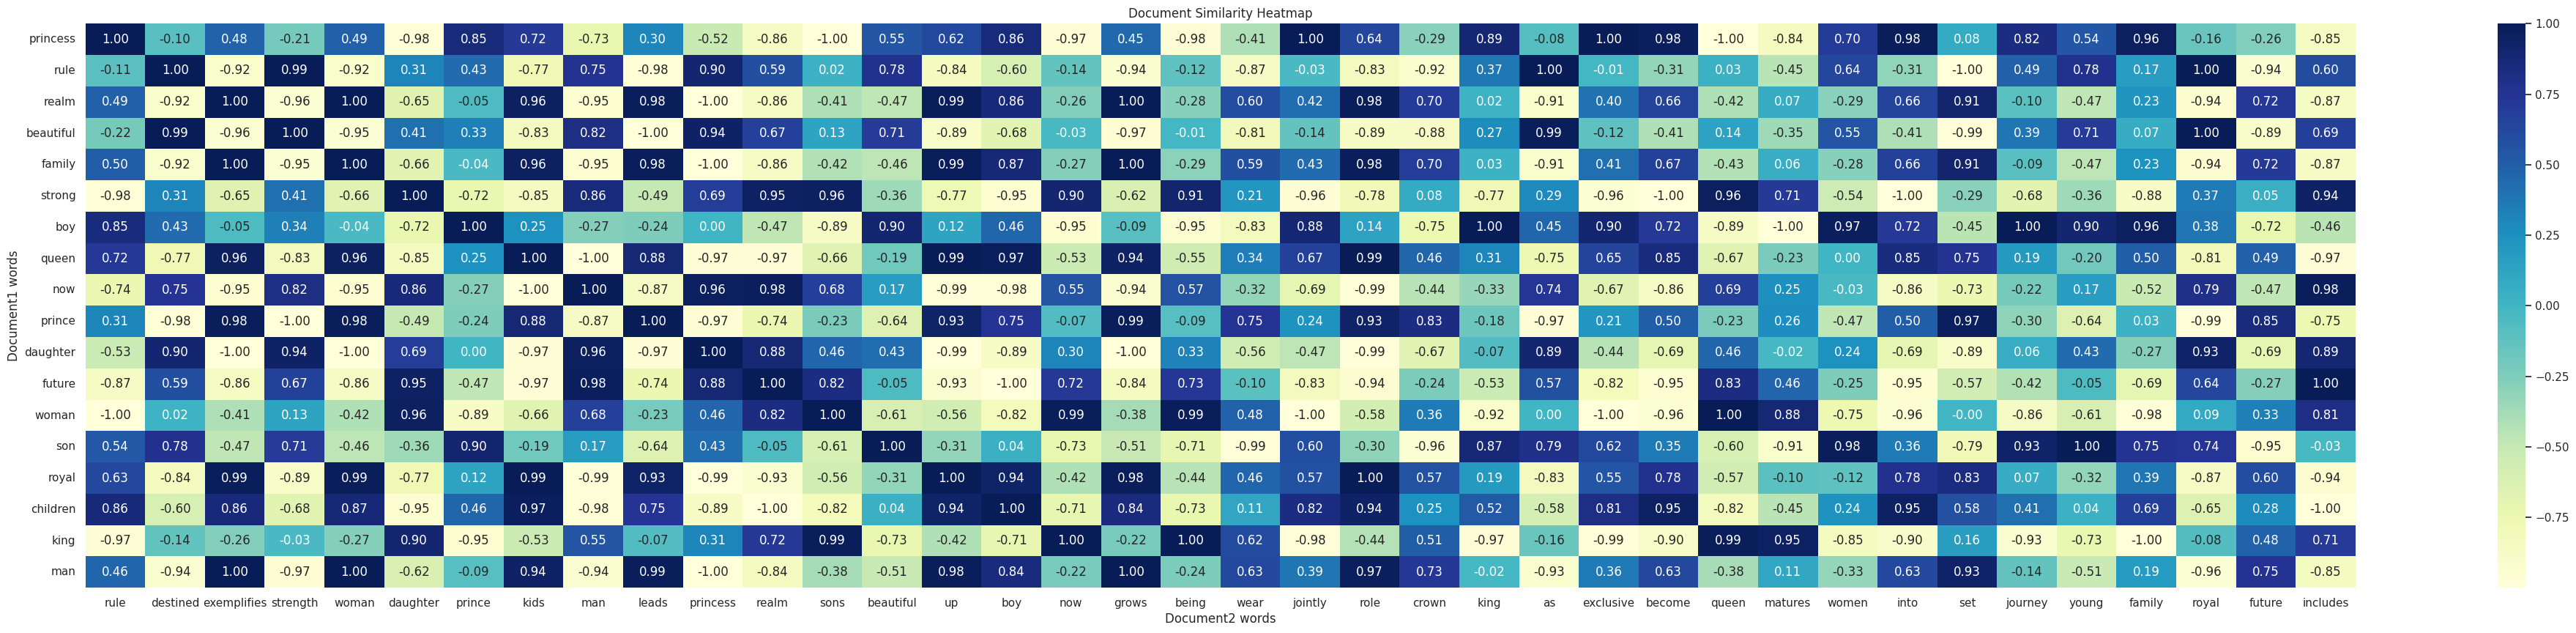

In [171]:
sns.set(style="white")
plt.figure(figsize=(50,10))

heatmap = sns.heatmap(cos_similarities, xticklabels=words2, yticklabels=words1 ,cmap="YlGnBu", annot=True, fmt=".2f", cbar=True)

plt.title('Document Similarity Heatmap')
plt.xlabel('Document2 words')
plt.ylabel('Document1 words')

plt.show()